### Context

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

C:\Users\n_int\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read csv file from directory
df = pd.read_csv('./data/diamonds.csv',sep = ',',index_col='Unnamed: 0')

In [3]:
#Explore 5 rows of this data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#describe data with basic statistic
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#There are missing values in 'x','y','z' columns in value is zero
#Clean data by drop zero value
df_clean = df[df['z']>0|(df['y']>0)|(df['x']>0)]

In [6]:
df_clean.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
#Explore object columns
df_clean.describe(include="O")

,cut,color,clarity
count,53920,53920,53920
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13063


In [8]:
#Observe detail of data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


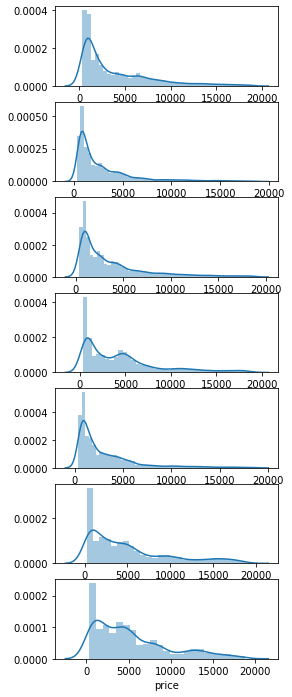

In [9]:
#price distribution depend on diamond's color
f,ax = plt.subplots(7,1,figsize=(4, 12))
for a,x in enumerate(pd.value_counts(df_clean['color']).index):
    sns.distplot(df['price'][df['color']==x],ax = ax[a])

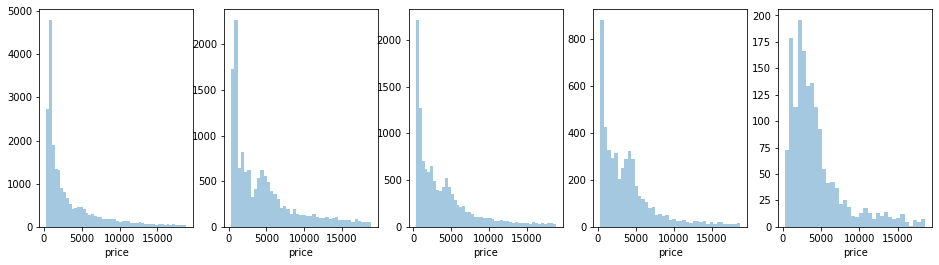

In [10]:
#price distribution depend on diamond's cut
f,ax = plt.subplots(1,5,figsize=(16, 4))
for a,x in enumerate(pd.value_counts(df_clean['cut']).index):
    sns.distplot(df['price'][df['cut']==x],ax = ax[a],kde=False)

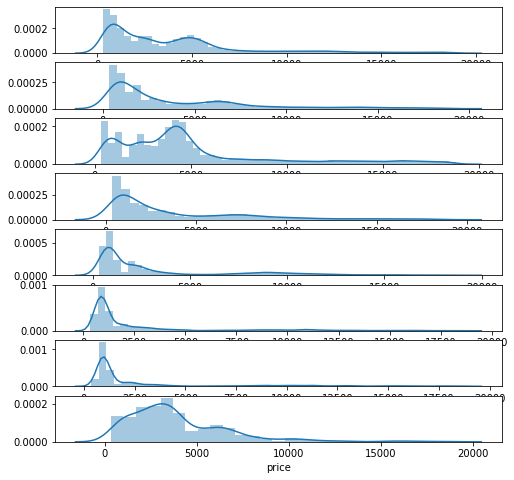

In [11]:
#price distribution depend on clarity
f,ax = plt.subplots(8,1,figsize=(8, 8))
for a,x in enumerate(pd.value_counts(df_clean['clarity']).index):
    sns.distplot(df['price'][df['clarity']==x],ax = ax[a])

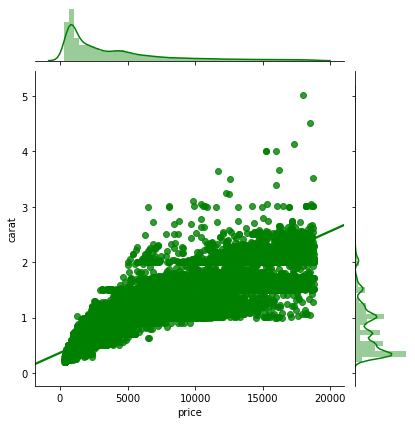

In [12]:
sns.jointplot(x = df_clean['price'],y = df_clean['carat'],kind='reg',color='green')

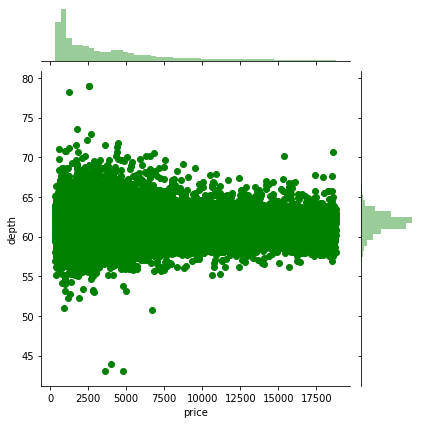

In [13]:
sns.jointplot(x = df_clean['price'],y = df_clean['depth'],kind='scatter',color='green')

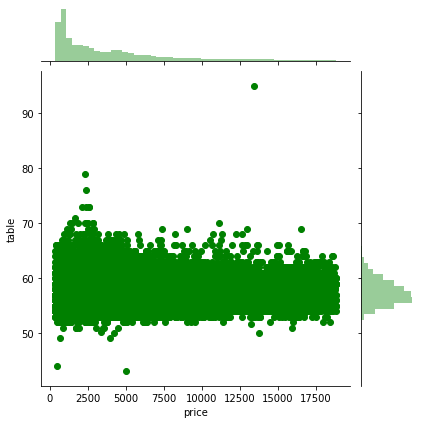

In [14]:
sns.jointplot(x = df_clean['price'],y = df_clean['table'],kind='scatter',color='green',)

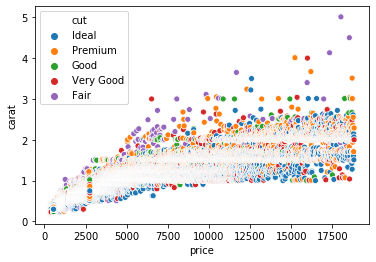

In [15]:
sns.scatterplot(x = 'price',y = 'carat',hue = 'cut',data = df_clean,sizes=(20,20))

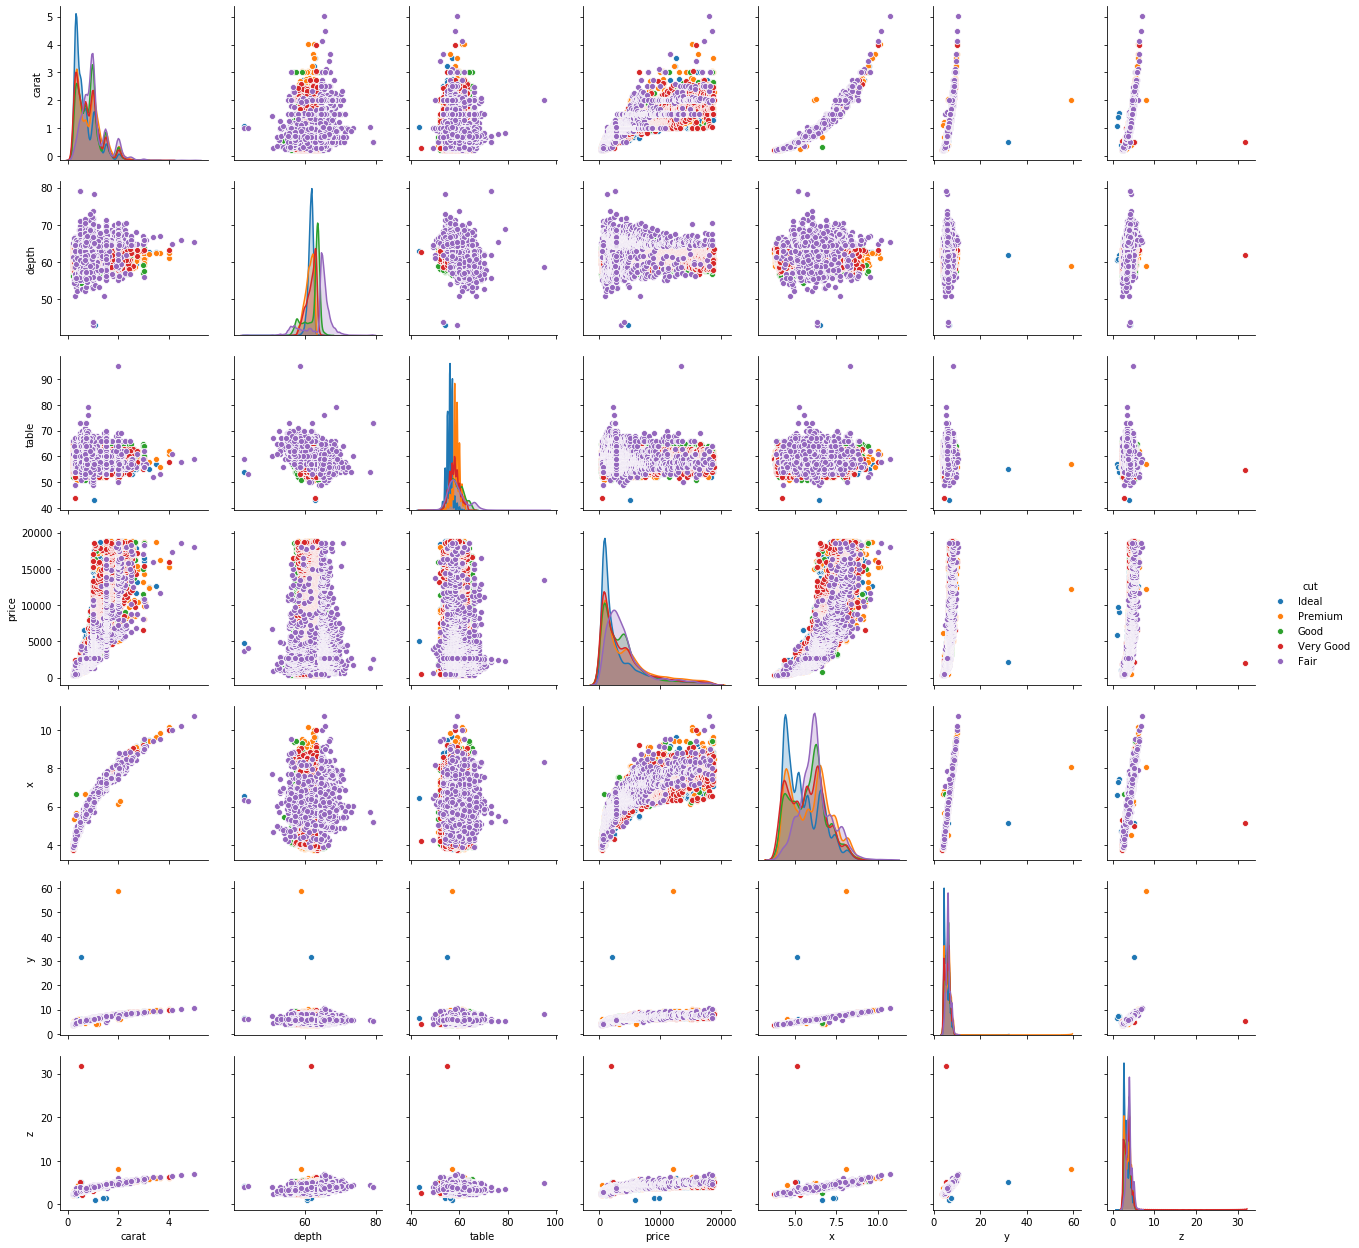

In [16]:
sns.pairplot(df_clean,hue = 'cut')

In [18]:
# transform object to numerical by LabelEncoder 
from sklearn.preprocessing import LabelEncoder
label_enc = {}
for i in df[['cut','color','clarity']]:
    enc = LabelEncoder()
    df[i] = enc.fit_transform(df[i])
    label_enc[i] = enc

In [21]:
X = df.drop(['price','x','y','z'],axis=1)
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

In [23]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_nor = scale.fit_transform(X_train)
X_test_nor = scale.transform(X_test)

In [24]:
X_train_nor = pd.DataFrame(X_train_nor,columns = X_train.columns)
X_test_nor = pd.DataFrame(X_test_nor,columns = X_train.columns)

### Algorithm Evaluation

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

models = []
results = []
names = []
models.append(('linear regression',LinearRegression()))
models.append(('RF',RandomForestRegressor(random_state=13)))
models.append(('Tree regression',DecisionTreeRegressor(random_state=13)))
models.append(('xgboot',XGBRegressor(random_state=13)))

for name,model in models:
    result = cross_val_score(model,X_train_nor,y_train,scoring='neg_root_mean_squared_error')
    results.append(result)
    names.append(name)
    print(f'the result of {name} is {result.mean()} with {result.std()}')

the result of linear regression is -1378.2315369164037 with 31.653785572412687
the result of RF is -569.2096768292274 with 17.913846551904783
the result of Tree regression is -750.7035923196047 with 16.183607533287063
the result of xgboot is -551.437341854267 with 14.705199949458645


In [26]:
from sklearn.model_selection import GridSearchCV,KFold
params = {"max_depth" : [None,2,4,6,8,10,20,40],
         "max_leaf_nodes" : [None,3,6,9,12,15]}
rf = RandomForestRegressor()
kfold = KFold(shuffle=True, random_state=13)
grid = GridSearchCV(rf,param_grid=params,cv=kfold,scoring='neg_root_mean_squared_error')
grid.fit(X_train_nor,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=13, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 20, 40],
                         'max_leaf_nodes': [None, 3, 6, 9, 12, 15]},
             scoring='neg_root_mean_squared_error')

In [27]:
grid.best_estimator_

RandomForestRegressor(max_depth=20)

## Build up model

In [28]:
rf = RandomForestRegressor(max_depth=20)
rf.fit(X_train_nor,y_train)

RandomForestRegressor(max_depth=20)

In [29]:
y_predict = rf.predict(X_test_nor)

In [30]:
mean_absolute_error(y_predict,y_test)

282.1884661633209

In [31]:
mean_squared_error(y_predict,y_test)

301297.2169095428

In [32]:
pickle.dump(rf,open("diamond_prediction.pkl",'wb'))
pickle.dump(scale,open("standard_scaler.pkl",'wb'))
pickle.dump(label_enc,open("Label_enc.pkl","wb"))